# Soduko

In [3]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi, sqrt
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
from qiskit_textbook.tools import array_to_latex

In [4]:
def ExecutePlot(job, backend = 'statevector'):
    blochSphere = ""
    phasePlot = ""
    
    simulator = Aer.get_backend(backend+'_simulator')
    
    result = simulator.run(job, shots = 1024).result() # Do the simulation and return the result
    
    if backend != "qasm":
        out_state = result.get_statevector()
        array_to_latex(out_state, pretext="\\text{Statevector} = ")
#         print("StateVector: ",out_state) # Display the output state vector
        blochSphere = plot_bloch_multivector(out_state)
        phasePlot = plot_state_qsphere(out_state)
        
    
    counts = result.get_counts()
    print("Counts     : ",counts)
    histogram = plot_histogram(counts)
    return histogram, blochSphere, phasePlot

## Solve a 2x2 grid
>Restriction: The below cell is not a generic 2x2 Sudoku solver.
It starts with the cell-0 and mapps all relations w.r.t to it.
it can solve for just two sudoku's:

|           | Col-0 | Col-1 |
| :-------: |:-----:|:-----:|
| **Row-0** |   0   |   x   |
| **Row-1** |   x   |   x   |

or


|           | Col-0 | Col-1 |
| :-------: |:-----:|:-----:|
| **Row-0** |   1   |   x   |
| **Row-1** |   x   |   x   |

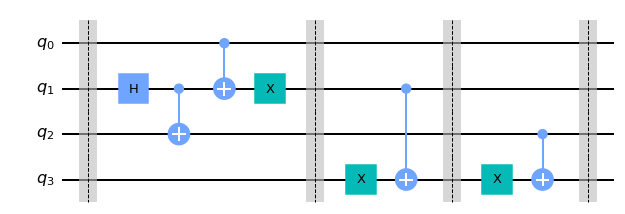

In [25]:
circuit = QuantumCircuit(4)

# Apply H-gate to Cell-0:
# circuit.h(0)

circuit.barrier()

# Cell-0 is entangled with Cell-1 and Cell-2
# But, if Cell-0 is 0, Cell-1 and Cell-2 will be 1 and vice versa
circuit.h(1)
circuit.cx(1,2)

circuit.cx(0,1)
circuit.x(1)
circuit.barrier()

# Cell-1 and Cell-2 is entangled with Cell-3
# But, if Cell-1 and Cell-2 are 1, Cell-0 will be 1 and vice versa
circuit.x(3)
circuit.cx(1,3)
circuit.barrier()

circuit.x(3)
circuit.cx(2,3)
circuit.barrier()

job = assemble(circuit)
    
# See the circuit:
circuit.draw('mpl')

In [26]:
histogram, blochSphere, phasePlot = ExecutePlot(job)

<IPython.core.display.Math object>

Counts     :  {'1010': 0.5, '1100': 0.5}


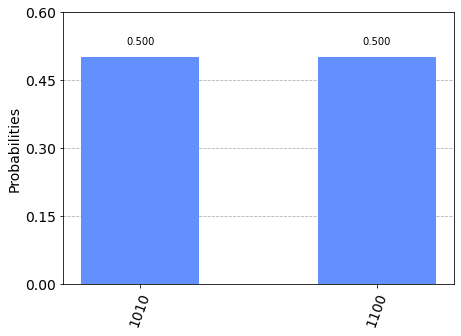

In [27]:
histogram

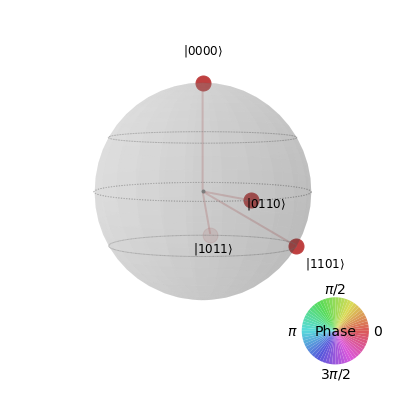

In [8]:
# blochSphere
phasePlot